In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [ ]:
panel = pd.read_csv('dhs_regional_panel.csv')
panel = panel.drop(columns=['avg_parity'])

In [ ]:
panel.head()

,year,v024,province_name,anc4_pct,facility_delivery_pct,sba_pct,urban_share_pct,low_education_pct,risky_maternal_age_pct,birth_interval_short_pct,lbw_pct,full_immun_pct
0,2002,12,Sumatera Utara,0.709615,0.344487,0.827922,0.429960,0.386486,0.278940,0.391190,0.115147,0.348179
1,2002,13,Sumatera Barat,0.865139,0.602981,0.820163,0.394327,0.337632,0.299571,0.300608,0.149896,0.539392
2,2002,14,Riau,0.837971,0.381888,0.758697,0.534813,0.394638,0.366670,0.247384,0.130668,0.496350
3,2002,15,Jambi,0.799175,0.379680,0.718145,0.310392,0.502543,0.451023,0.171904,0.081931,0.395001
4,2002,16,Sumatera Selatan,0.793440,0.371098,0.773976,0.313627,0.545571,0.449110,0.224071,0.096247,0.467269


# EDA Per Tahun

<Figure size 1400x1000 with 0 Axes>

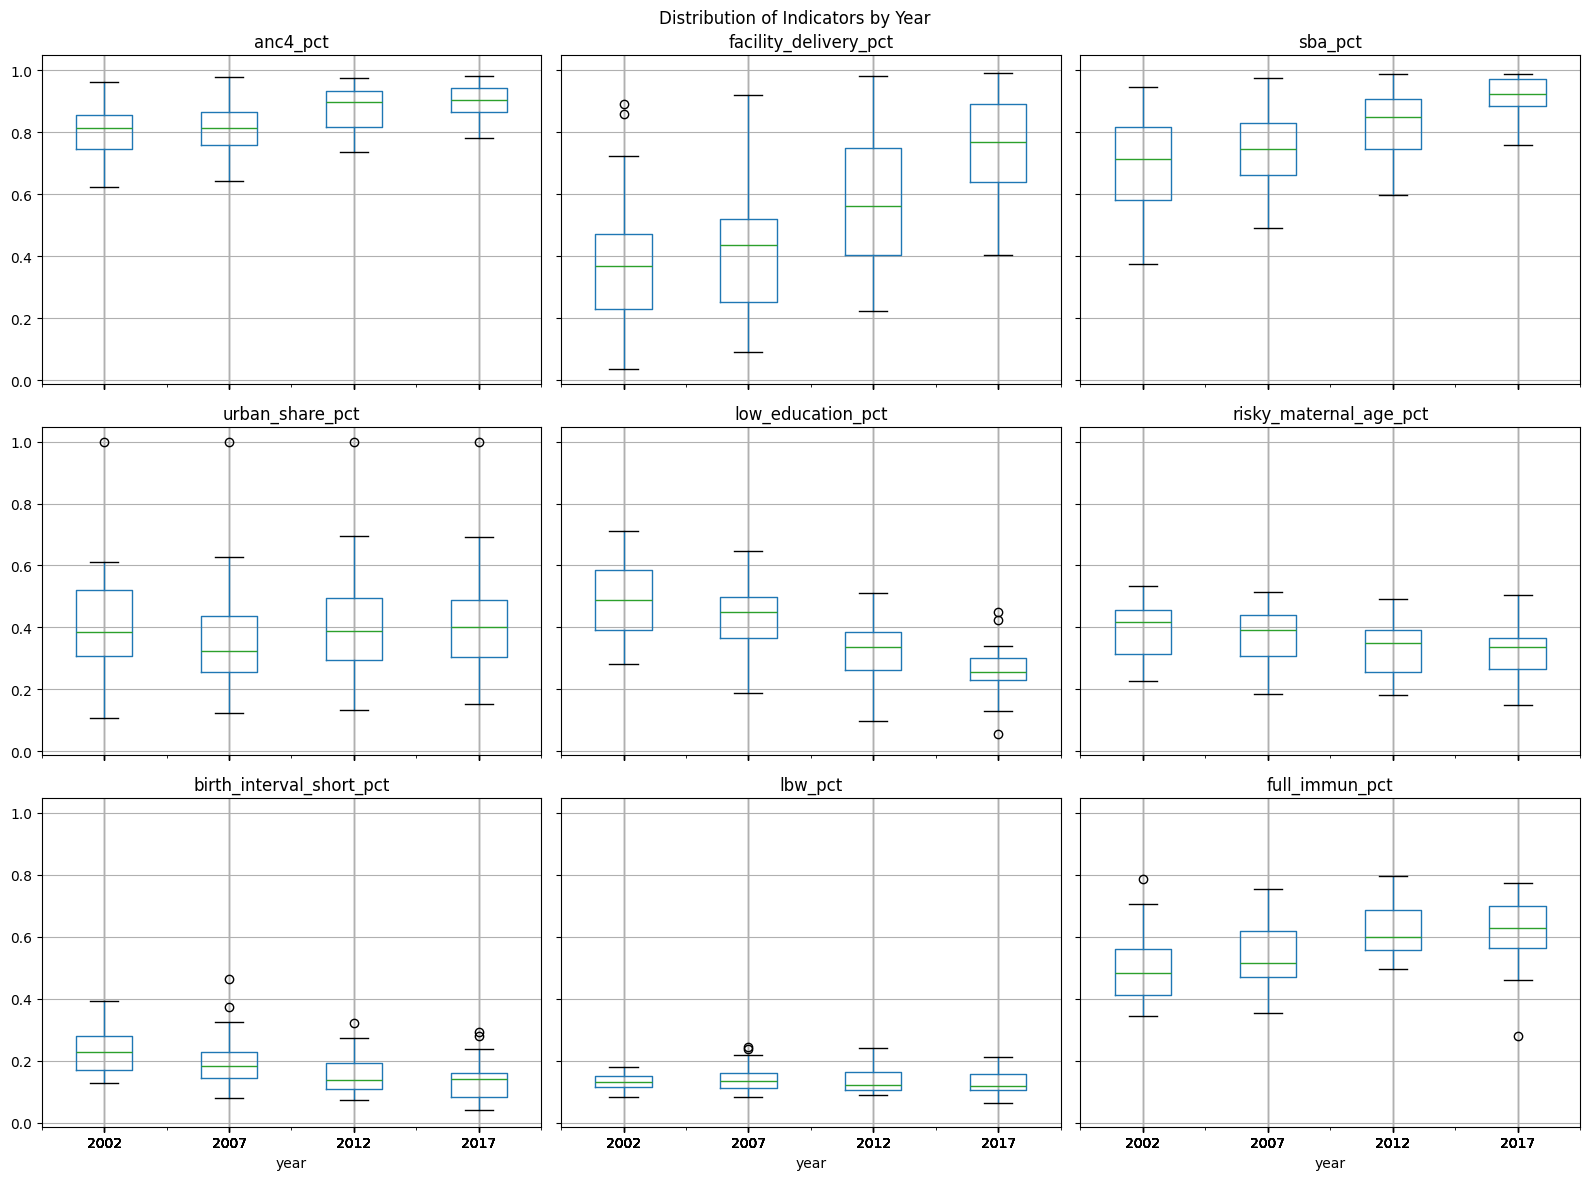

In [ ]:
# distribusi indikator per tahun

indicator_cols = [c for c in panel.columns if c not in ['year', 'region', 'province_name', 'v024']]

plt.figure(figsize=(14, 10))
panel.boxplot(column=indicator_cols, by='year', figsize=(16,12))
plt.suptitle("Distribution of Indicators by Year")
plt.tight_layout()
plt.show()


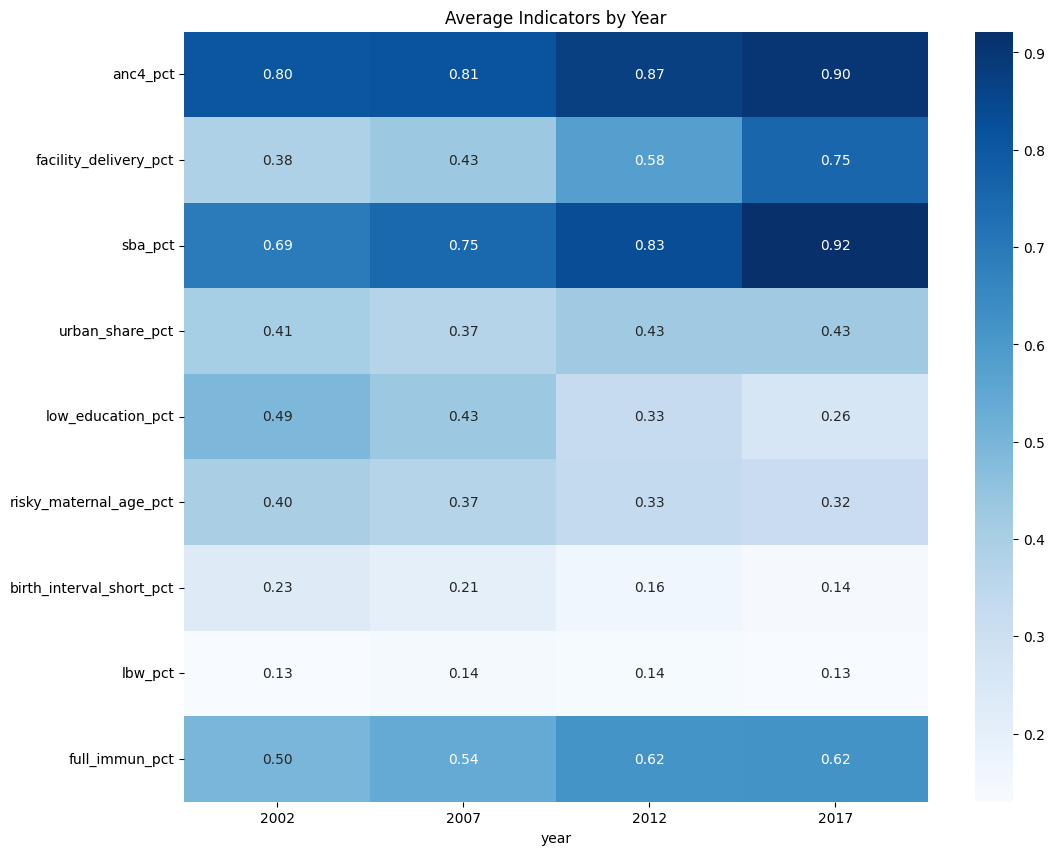

In [ ]:
# rata-rata indikator per tahun
panel_trend = panel.groupby('year')[indicator_cols].mean().T

plt.figure(figsize=(12,10))
sns.heatmap(panel_trend, annot=True, fmt=".2f", cmap="Blues")
plt.title("Average Indicators by Year")
plt.show()


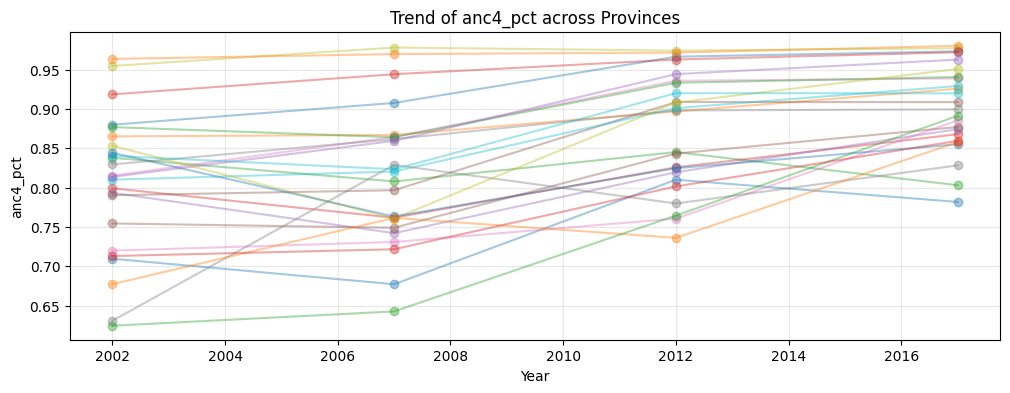

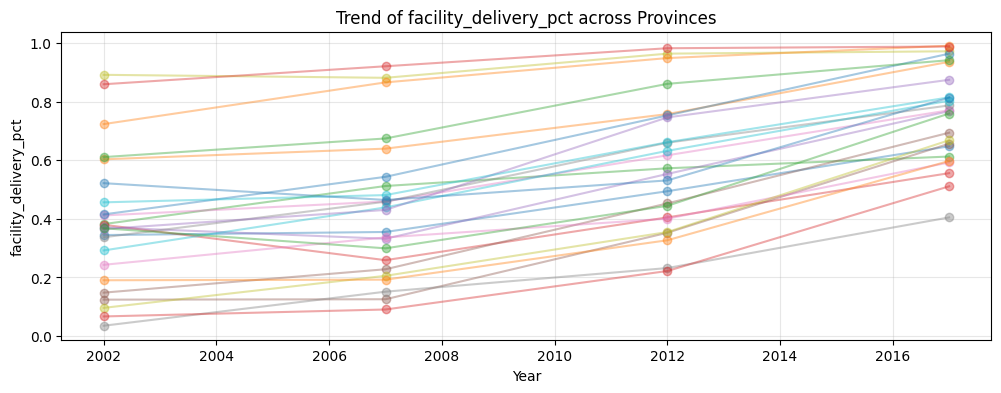

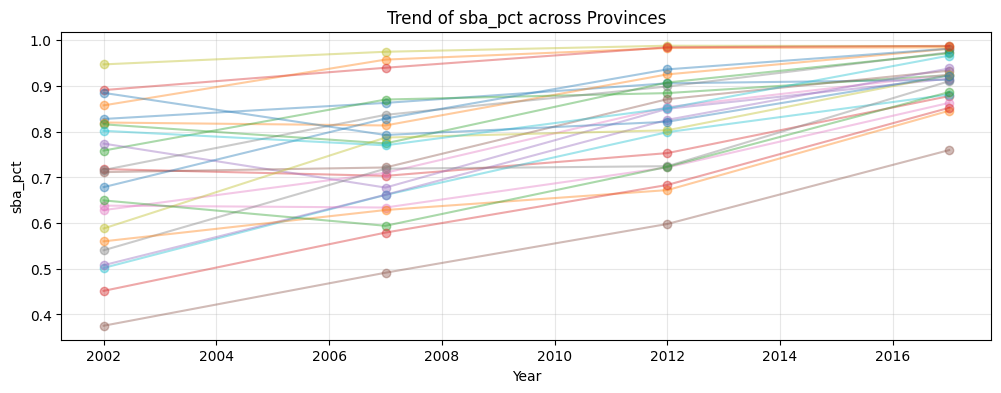

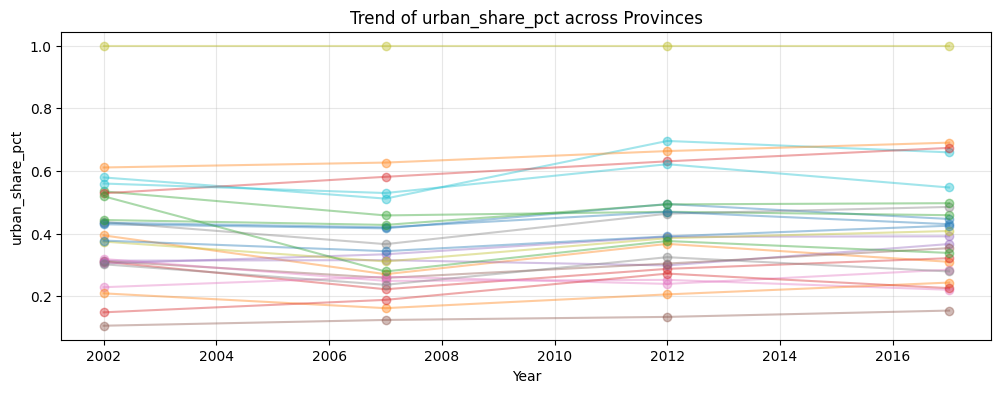

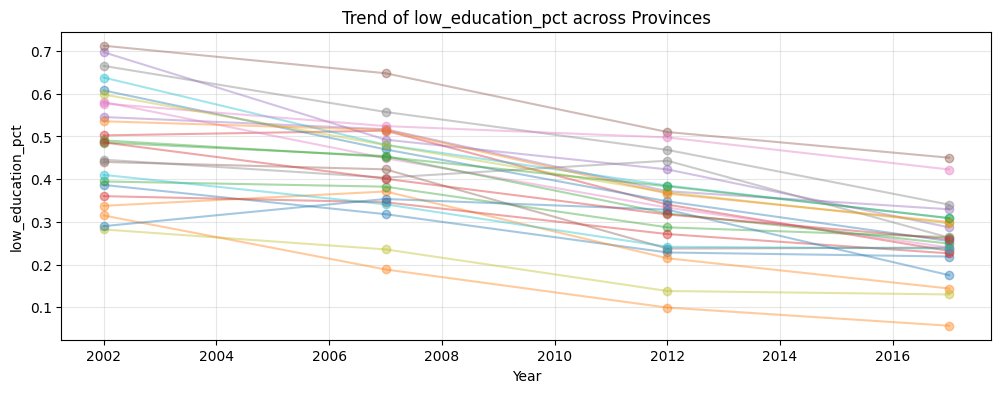

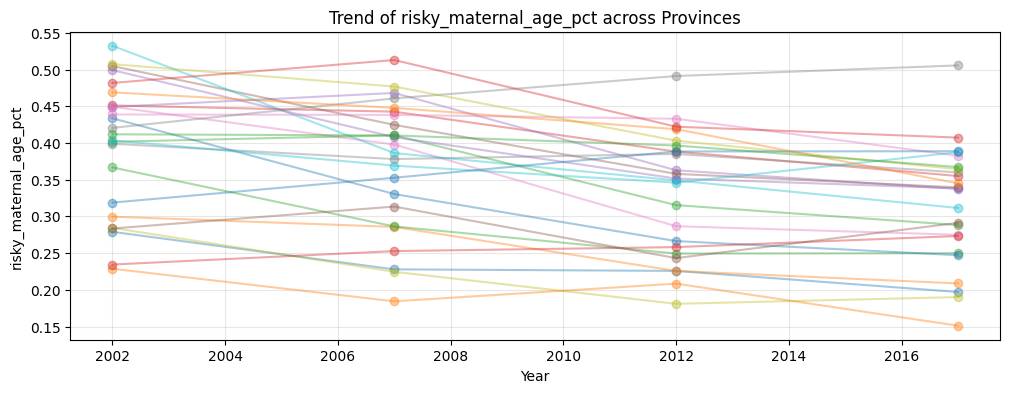

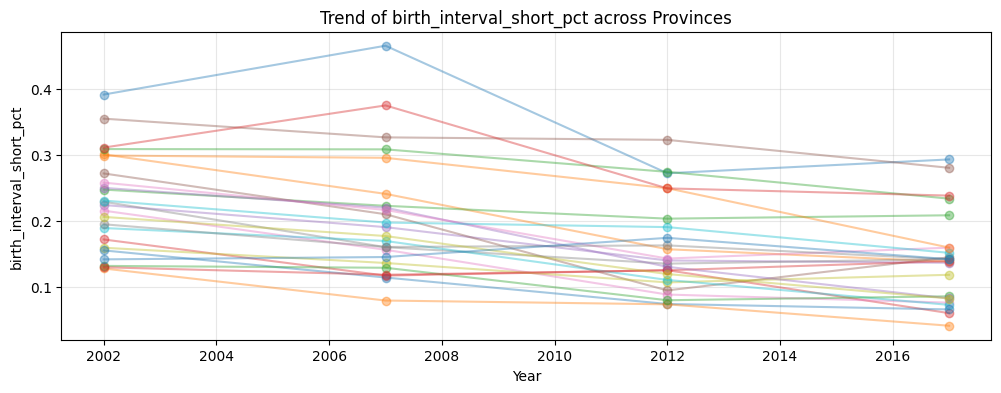

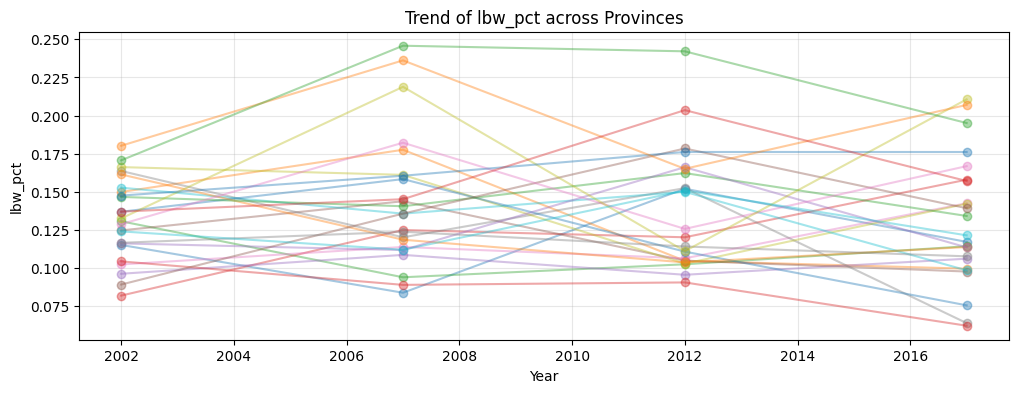

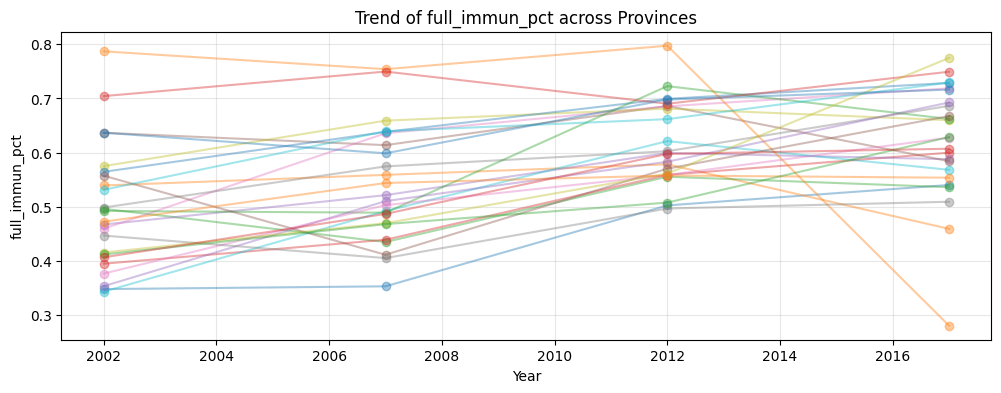

In [ ]:
# perubahan provinsi per indikator (line chart)
for col in indicator_cols:
    plt.figure(figsize=(12,4))
    for prov in panel['province_name'].unique():
        dfp = panel[panel['province_name']==prov].sort_values('year')
        plt.plot(dfp['year'], dfp[col], marker='o', alpha=0.4)
    plt.title(f"Trend of {col} across Provinces")
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.grid(True, alpha=.3)
    plt.show()


# EDA Keseluruhan

In [ ]:
panel.describe()


,year,v024,anc4_pct,facility_delivery_pct,sba_pct,urban_share_pct,low_education_pct,risky_maternal_age_pct,birth_interval_short_pct,lbw_pct,full_immun_pct
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2009.500000,41.041667,0.848054,0.537642,0.799165,0.407579,0.377741,0.353641,0.183704,0.135729,0.567846
std,5.619515,22.258726,0.087047,0.256956,0.142466,0.186328,0.137486,0.090877,0.083072,0.037792,0.113870
min,2002.000000,12.000000,0.624404,0.035076,0.375234,0.105997,0.056771,0.151067,0.041424,0.062172,0.280548
25%,2005.750000,17.750000,0.795875,0.354132,0.711199,0.283589,0.279560,0.284107,0.128853,0.108398,0.492278
50%,2009.500000,34.500000,0.856509,0.516724,0.826969,0.377151,0.367647,0.363520,0.159958,0.129730,0.566398
75%,2013.250000,62.250000,0.918909,0.753870,0.914371,0.493656,0.480044,0.419179,0.234831,0.158890,0.659240
max,2017.000000,74.000000,0.980407,0.990636,0.988281,1.000000,0.712552,0.532409,0.465070,0.245818,0.797304


In [ ]:
panel.isna().sum()


,0
year,0
v024,0
province_name,0
anc4_pct,0
facility_delivery_pct,0
sba_pct,0
urban_share_pct,0
low_education_pct,0
risky_maternal_age_pct,0
birth_interval_short_pct,0


In [ ]:
feature_cols = [
    'anc4_pct',
    'facility_delivery_pct',
    'sba_pct',
    'urban_share_pct',
    'low_education_pct',
    'risky_maternal_age_pct',
    'birth_interval_short_pct',
    'lbw_pct',
    'full_immun_pct'
]


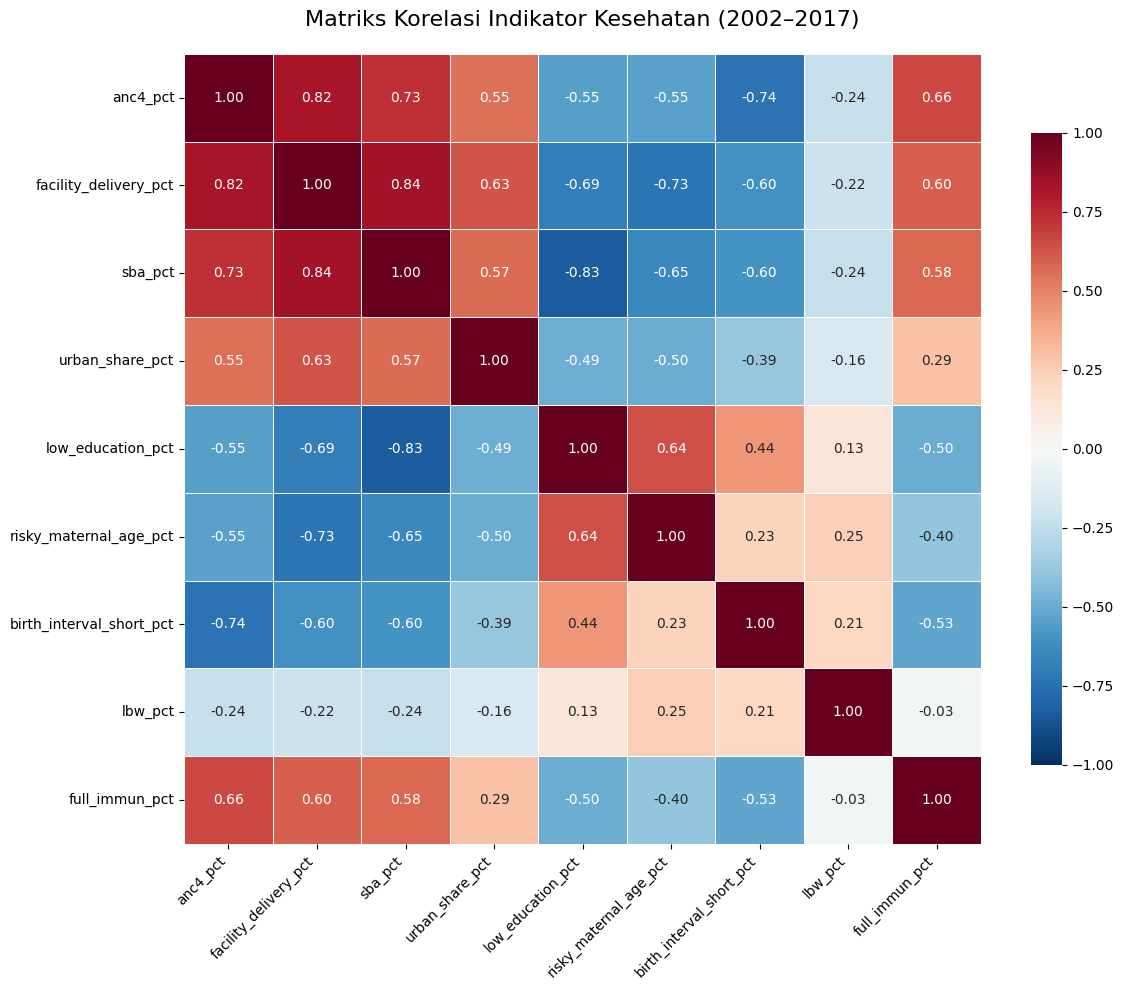

In [ ]:
# Feature Corr
corr_data = panel[feature_cols].corr()

# Plotting
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_data,
    cmap="RdBu_r",          # Red-Blue reverse (Merah=Positif, Biru=Negatif)
    vmin=-1, vmax=1,        # Range pasti -1 sampai 1
    center=0,               # Titik tengah putih
    annot=True,             # Tampilkan angkanya
    fmt=".2f",              # 2 angka desimal
    linewidths=.5,          # Garis pemisah antar kotak
    cbar_kws={"shrink": .8} # Perkecil color bar sedikit
)

plt.title("Matriks Korelasi Indikator Kesehatan (2002–2017)", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# 2. Inisialisasi Scaler
scaler = StandardScaler()

# 3. Buat DataFrame Baru untuk Data yang di-Scale
df_scaled = panel.copy()

# 4. Scaling
# fit_transform hanya pada kolom fitur
scaled_values = scaler.fit_transform(panel[feature_cols])

# Masukkan kembali nilai yang sudah di-scale ke dataframe baru
df_scaled[feature_cols] = scaled_values

print("Preview Data setelah Scaling:")
print(df_scaled[feature_cols].head())

print("\nCek Statistik (Mean harus ~0, Std harus ~1):")
print(df_scaled[feature_cols].describe().loc[['mean', 'std']].round(2))

Preview Data setelah Scaling:
   anc4_pct  facility_delivery_pct   sba_pct  urban_share_pct  \
0 -1.598745              -0.755648  0.202912         0.120747   
1  0.197304               0.255617  0.148160        -0.071496   
2 -0.116448              -0.609331 -0.285542         0.686438   
3 -0.564475              -0.617971 -0.571685        -0.524325   
4 -0.630705              -0.651542 -0.177738        -0.506875   

   low_education_pct  risky_maternal_age_pct  birth_interval_short_pct  \
0           0.063940               -0.826319                  2.510779   
1          -0.293260               -0.598107                  1.414654   
2           0.123548                0.144122                  0.770582   
3           0.912513                1.077209                 -0.142799   
4           1.227114                1.056045                  0.488471   

    lbw_pct  full_immun_pct  
0 -0.547461       -1.939226  
1  0.376830       -0.251193  
2 -0.134611       -0.631167  
3 -1.430984   

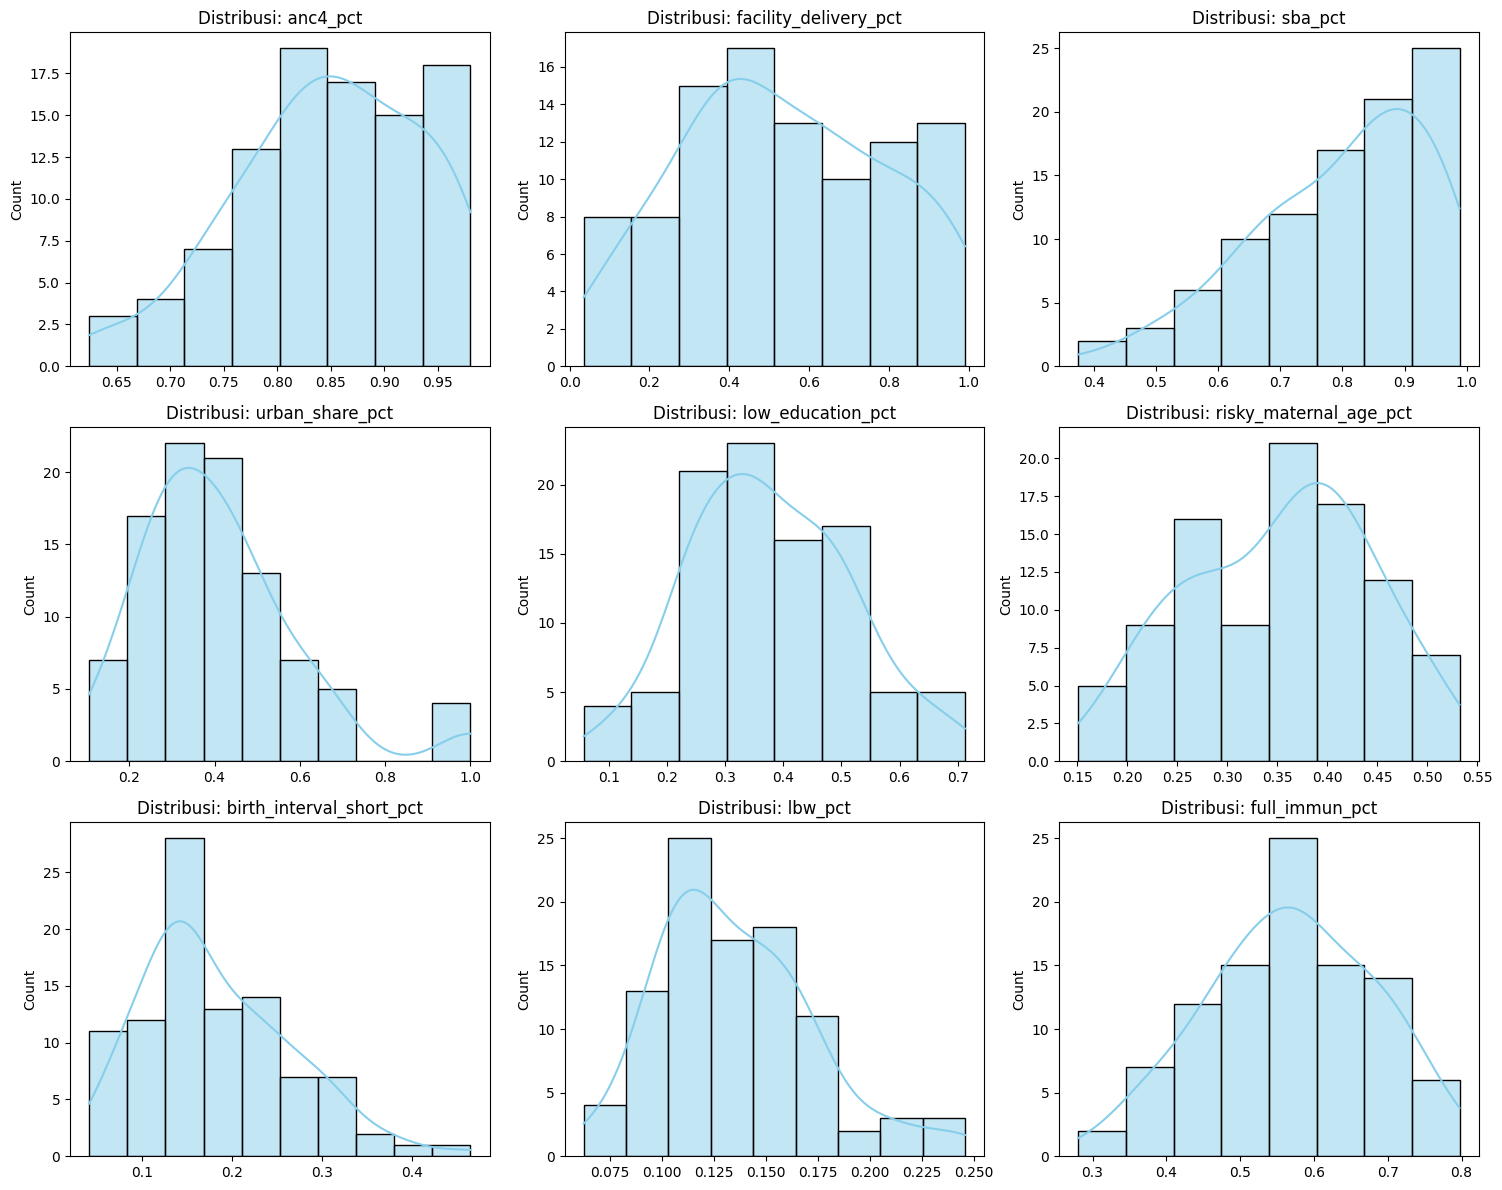

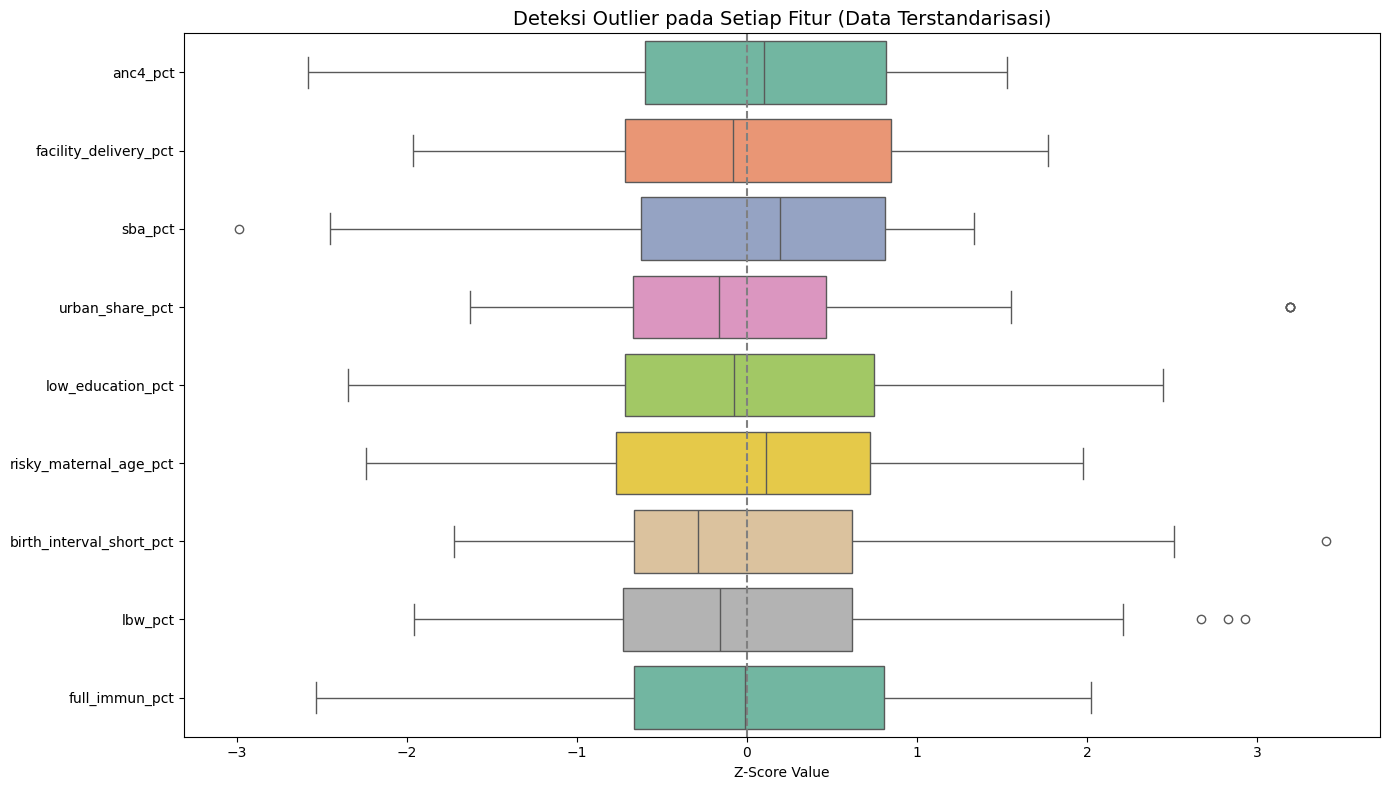

In [ ]:
# Pastikan pakai data ASLI (panel), bukan yang sudah di-scale
features_to_plot = [
    'anc4_pct', 'facility_delivery_pct', 'sba_pct',
    'urban_share_pct', 'low_education_pct', 'risky_maternal_age_pct',
    'birth_interval_short_pct', 'lbw_pct', 'full_immun_pct'
]

# --- 1. HISTOGRAM (Melihat Distribusi) ---
n_cols = 3
n_rows = math.ceil(len(features_to_plot) / n_cols)

plt.figure(figsize=(15, n_rows * 4))
for i, col in enumerate(features_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(panel[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi: {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

# --- 2. BOXPLOT (Melihat Outlier) ---
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_scaled[features_to_plot], orient='h', palette="Set2")
plt.title('Deteksi Outlier pada Setiap Fitur (Data Terstandarisasi)', fontsize=14)
plt.xlabel('Z-Score Value')
plt.axvline(x=0, color='grey', linestyle='--') # Garis tengah rata-rata
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

def hopkins(X):
    d = X.shape[1]
    # n = len(X) # rows
    n = int(0.1 * len(X)) #  ambil sampel 10% dari data (standard)

    if n < 5: n = 5

    m = int(0.1 * len(X))
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, X.shape[0], 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if np.isnan(H):
        print(ujd, wjd)
        H = 0

    return H



In [ ]:
feature_columns = [c for c in panel.columns if c not in ['year', 'region', 'province_name', 'v024']]
X_data = df_scaled[feature_columns].copy()

# 2. Hitung Hopkins
hopkins_score = hopkins(X_data)

print(f"Hopkins Statistic Score: {hopkins_score:.4f}")

# 3. Interpretasi
if hopkins_score > 0.7:
    print("Interpretasi: Clustering Tendency TINGGI (Data layak di-cluster).")
elif 0.5 < hopkins_score <= 0.7:
    print("Interpretasi: Clustering Tendency SEDANG (Data punya pola, tapi mungkin agak menyebar).")
else:
    print("Interpretasi: Clustering Tendency RENDAH (Data cenderung acak/uniform).")

Hopkins Statistic Score: 0.7264
Interpretasi: Clustering Tendency TINGGI (Data layak di-cluster).


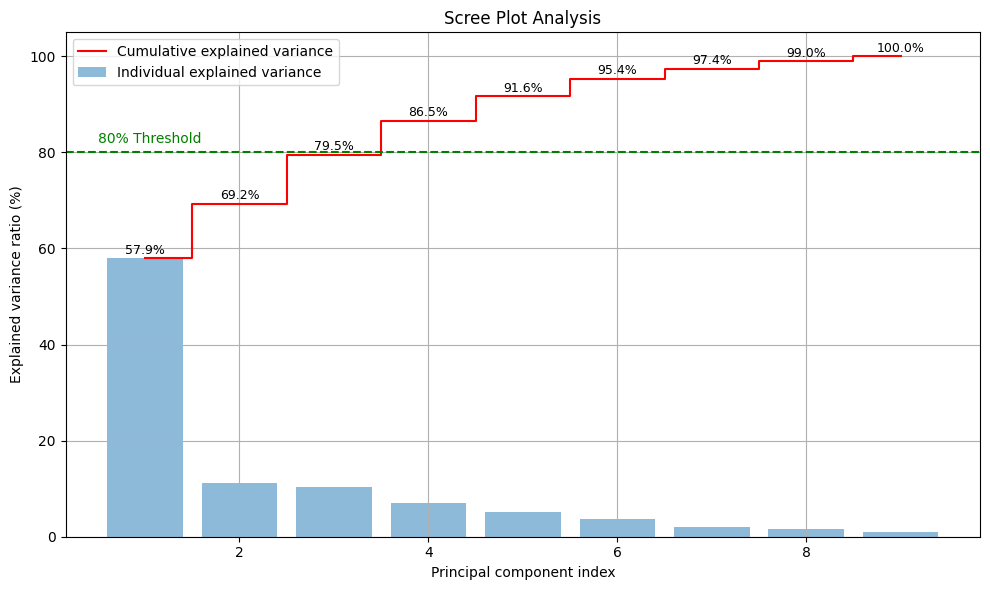

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

X_scaled = df_scaled[feature_cols]

# 1. Fit PCA
# Kita pasang n_components=None dulu biar dia hitung semua kemungkinan
pca = PCA(n_components=None)
pca.fit(X_scaled)

# 2. Ambil nilai Variance
exp_var = pca.explained_variance_ratio_ * 100 # dalam persen
cum_exp_var = np.cumsum(exp_var) # akumulasi persen

# 3. Plotting Scree Plot
plt.figure(figsize=(10, 6))

# Bar chart untuk varians per komponen
plt.bar(range(1, len(exp_var)+1), exp_var, alpha=0.5, align='center',
        label='Individual explained variance')

# Line chart untuk akumulasi varians
plt.step(range(1, len(exp_var)+1), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

# Label dan Garis Bantu
plt.ylabel('Explained variance ratio (%)')
plt.xlabel('Principal component index')
plt.title('Scree Plot Analysis')
plt.legend(loc='best')
plt.grid(True)

# Tambahkan garis threshold (misal 80% atau 90%)
plt.axhline(y=80, color='green', linestyle='--', label='80% Threshold')
plt.text(0.5, 82, '80% Threshold', color='green')

# Tampilkan angka di tiap titik (Opsional, biar detail)
for i, v in enumerate(cum_exp_var):
    plt.text(i+1, v+1, f"{v:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show() # Simpan dengan plt.savefig('scree_plot.png') kalau mau